In [1]:
import pandas as pd
import numpy as np

# Pandas Intro

## Series

In [4]:
a = np.arange(1,4)
a


array([1, 2, 3])

In [11]:
s1 = pd.Series(a, index=['a','b','c'])
s2 = pd.Series(a**2, index=['a','b','d'])
print(s1)
print(s2)

a    1
b    2
c    3
dtype: int64
a    1
b    4
d    9
dtype: int64


## Series Indexing

In [13]:
s1

a    1
b    2
c    3
dtype: int64

In [18]:
# Explicit indexing
s1.loc['a']

1

In [20]:
# Implicit (location based) indexing
s1.iloc[-1]

3

## DataFrame

In [21]:
# Create a dictionary with student names and their scores
data = {
        'Student Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Score': [92, 78, 85, 90, 88]
}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)
df

,Student Name,Score
0,Alice,92
1,Bob,78
2,Charlie,85
3,David,90
4,Eve,88


In [50]:
# load the data
df = pd.read_csv('https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/drinks.csv')
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [31]:
df.to_excel('./drinks.xlsx', engine='openpyxl')

In [49]:
country_indexed_df = df.set_index('country')
country_indexed_df.head(3)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF


## DataFrame Indexing

In [52]:
country_indexed_df.loc['Albania','beer_servings']

89

In [54]:
# get last row, second from right column
country_indexed_df.iloc[1, 0:3]

beer_servings       89
spirit_servings    132
wine_servings       54
Name: Albania, dtype: object

In [56]:
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [59]:
# Get all columns for country=='Albania'
df[df['country']=='Albania']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU


In [68]:
# which country consumes most wine
max_wine = df['wine_servings'].max()
df.loc[df['wine_servings']==max_wine, 'country':'wine_servings']

,country,beer_servings,spirit_servings,wine_servings
61,France,127,151,370


<Axes: xlabel='beer_servings', ylabel='spirit_servings'>

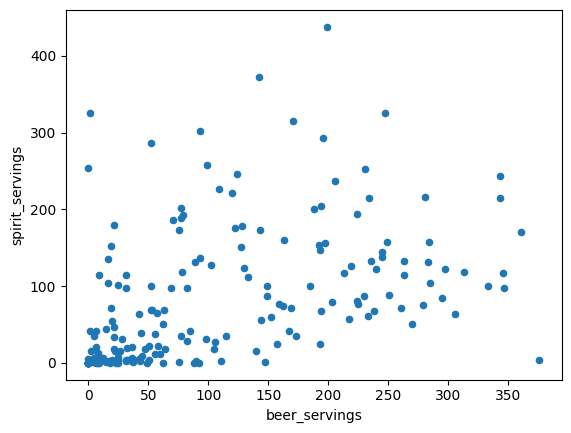

In [70]:
df.plot.scatter(x='beer_servings', y='spirit_servings' )

## Analyze Teaching Methods

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/teaching_methods.csv')
df.shape

(100, 2)

In [74]:
df.iloc[::10,:]

,Score,Teaching Method
0,27.091079,Method 1
10,21.944534,Method 1
20,31.560472,Method 1
30,34.596833,Method 2
40,20.215443,Method 2
50,33.780423,Method 3
60,26.388028,Method 3
70,19.988714,Method 3
80,34.606236,Method 4
90,36.697394,Method 4


In [77]:
df[df['Teaching Method']=='Method 1'].describe()

,Score
count,25.000000
mean,24.791992
std,3.849231
min,18.047062
25%,21.471141
50%,24.776698
75%,27.855233
max,31.560472


In [87]:

df.groupby('Teaching Method').describe()

Score                                                        \
                count       mean       std        min        25%        50%   
Teaching Method                                                               
Method 1         25.0  24.791992  3.849231  18.047062  21.471141  24.776698   
Method 2         25.0  25.268759  3.135806  20.215443  23.483270  25.141909   
Method 3         25.0  26.069367  7.507303   9.766905  19.571832  28.221542   
Method 4         25.0  32.220818  4.375810  23.470770  29.940410  31.572724   

                                       
                       75%        max  
Teaching Method                        
Method 1         27.855233  31.560472  
Method 2         26.712049  34.596833  
Method 3         31.572529  39.008311  
Method 4         36.150242  39.715477

## Drniks dataset analyses

In [88]:
# load the data
df = pd.read_csv('https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/drinks.csv')
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [93]:
df.groupby('continent')['country'].count()

continent
AF    53
AS    44
EU    45
OC    16
SA    12
Name: country, dtype: int64

In [96]:
max_beer = df['beer_servings'].max()
df.groupby('continent')['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0
